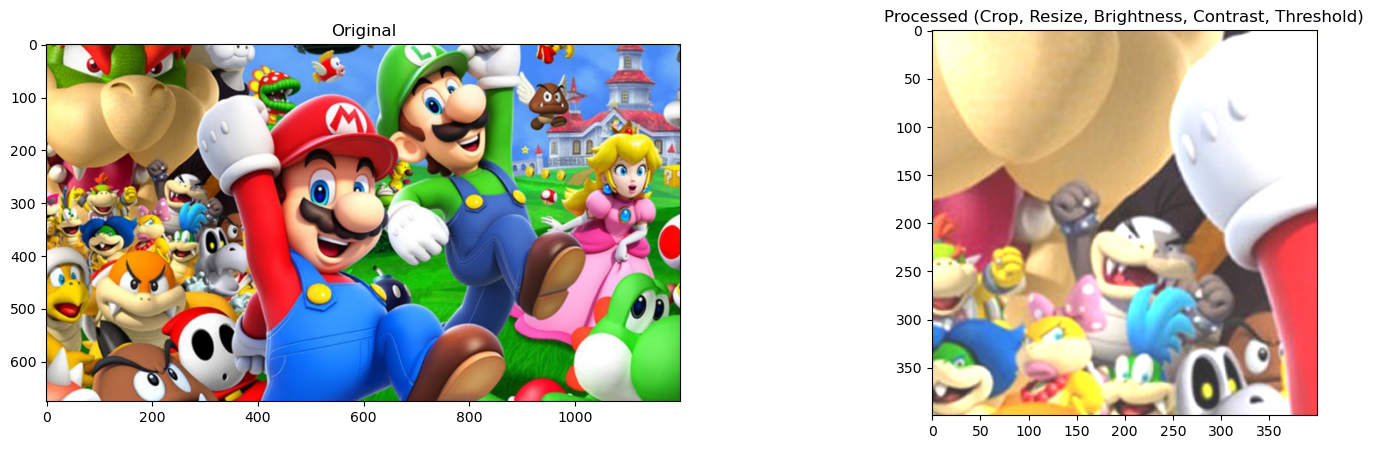

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(input_image_path):
    # Load the input image
    img_rgb = cv2.imread(input_image_path)

    # Crop the image
    x, y, width, height = 100, 100, 300, 300
    img_rgb_cropped = img_rgb[y:y+height, x:x+width]

    # Resize the cropped image
    target_size = (400, 400)
    img_rgb_resized = cv2.resize(img_rgb_cropped, target_size)

    # Adjust Brightness
    brightness = 50
    matrix = np.ones(img_rgb_resized.shape, dtype="uint8") * brightness
    img_rgb_brighter = cv2.add(img_rgb_resized, matrix)
    img_rgb_darker = cv2.subtract(img_rgb_resized, matrix)

    # Adjust Contrast
    lower_contrast = 0.8
    higher_contrast = 1.2
    matrix1 = np.ones(img_rgb_resized.shape, dtype="float64") * lower_contrast
    matrix2 = np.ones(img_rgb_resized.shape, dtype="float64") * higher_contrast
    img_rgb_lower_contrast = np.uint8(cv2.multiply(np.float64(img_rgb_resized), matrix1))
    img_rgb_higher_contrast = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb_resized), matrix2), 0, 255))

    # Apply Thresholding
    img_read = cv2.cvtColor(img_rgb_resized, cv2.COLOR_BGR2GRAY)
    threshold_value = 100
    retval, img_thresh = cv2.threshold(img_read, threshold_value, 255, cv2.THRESH_BINARY)

    # Display the original and processed images
    plt.figure(figsize=[18, 5])
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img_rgb_brighter, cv2.COLOR_BGR2RGB))
    plt.title("Processed (Crop, Resize, Brightness, Contrast, Threshold)")

    # Show the images
    plt.show()

    # Return the original and processed images
    return img_rgb_cropped, img_rgb_resized, img_rgb_brighter

# Example usage of the function
input_image_path = "C:/Users/Lenovo/Desktop/Sift(Opencv)/mario_train.jpeg"
cropped, resized, processed = process_image(input_image_path)
